# Efectos de la Reanimacion Cardiopulmonar Extrahospitalaria Transtelefonica en la supervivencia del paciente en la ciudad de Madrid

## Introducccion
Reanimacion Cardiopulmonar (RCP)
Servicio de Atencion municipal de urgencia y rescate (SAMUR)

## Objetivos

El objetivo de este estudio es este estudio es comparar el Retorno de la Circulacion Espontanea (ROSC, por sus siglas en ingles) y la supervivencia del paciente a los 7 dias, comparando 3 grupos de pacientes: Aquellos que no recibieron RCP previa a la llegada de la primera unidad de Soporte Vital Avanzado (SVA); aquellos que recibieron RCP básica sin soporte telefónico; y aquellos que han recibido RCP transtelefonica hasta la llegada de la SVA.

## Metodologia
Esto es un estudio observacional de los datos proporcionados por SAMUR-Proteccion Civil, el servicio de emergencias extrahospitalarias de la ciudad de Madrid. Los datos fueron extraidos de la base de datos de SAMUR-PC y analizados utilizando Python y Pandas. Estos datos corresponden a todas las paradas cardiorrespiratorias atendidad por este servicio de emergencias extrahospitalaria en el espacio comprendido entre el 3 de enero al 31 de diciembre de 2024. A continuación se presentan las graficas donde se exponen las variables a estudiar.


TABLA

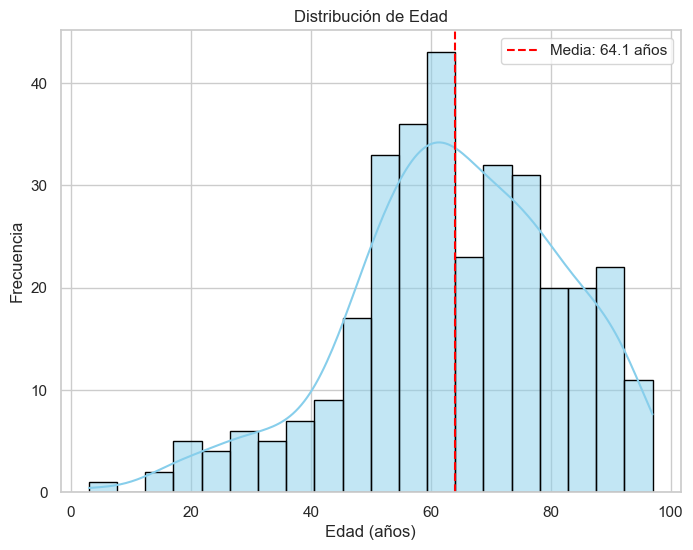

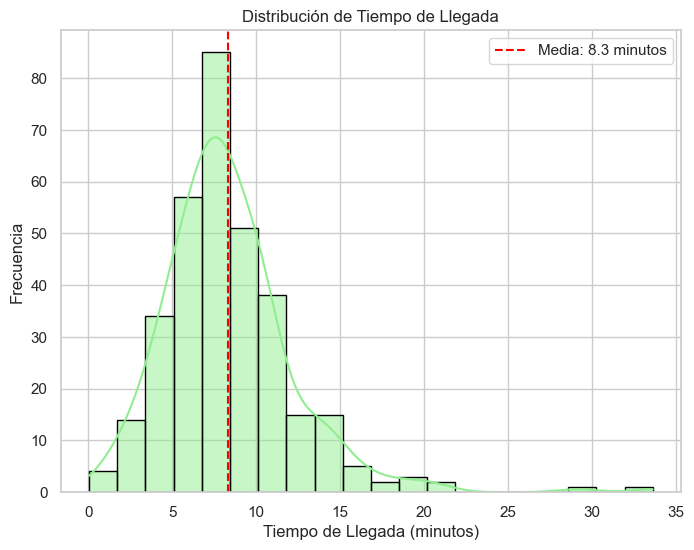

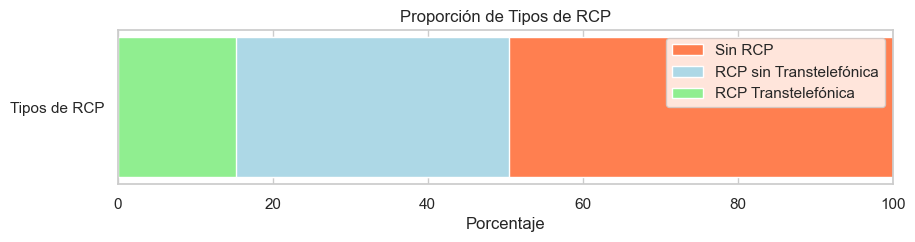

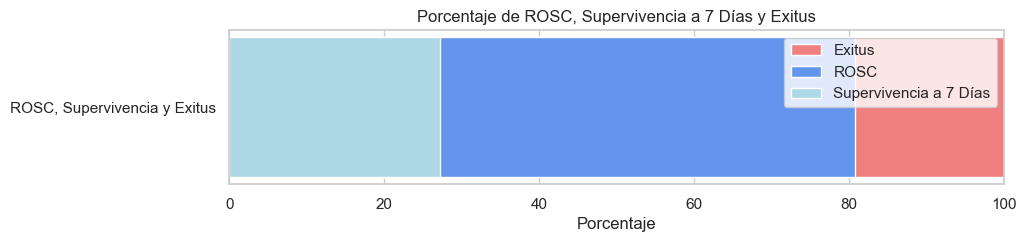

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
data_path = '/Users/miguel/Desktop/SAMUR/RCP Transtelefonica/data/cleaned_data.csv'
data = pd.read_csv(data_path)

# Convert time to minutes
data['TIEMPO_LLEGADA_MINUTOS'] = data['TIEMPO_LLEGADA_UNIDAD'] / 60

# Calculate RCP type proportions
rcp_types = {
    'Sin RCP': ((~data['RCP_TRANSTELEFONICA']) & (~data['RCP_EN_LLEGADA'])).mean() * 100,
    'RCP sin Transtelefónica': ((data['RCP_EN_LLEGADA']) & (~data['RCP_TRANSTELEFONICA'])).mean() * 100,
    'RCP Transtelefónica': (data['RCP_TRANSTELEFONICA']).mean() * 100
}

# Calculate ROSC and survival percentages
rosc_percentage = data['ROSC'].mean() * 100
survival_percentage = data['SOBREVIVE_7DIAS'].mean() * 100

# Ensure the output directory exists
output_dir = '/Users/miguel/Desktop/SAMUR/RCP Transtelefonica/proyecto/figures'
os.makedirs(output_dir, exist_ok=True)

# Visualizations
sns.set(style='whitegrid')

# Age distribution with mean line
plt.figure(figsize=(8, 6))
sns.histplot(data['EDAD'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.axvline(data['EDAD'].mean(), color='red', linestyle='--', label=f"Media: {data['EDAD'].mean():.1f} años")
plt.title('Distribución de Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig(os.path.join(output_dir, 'hist_edad_con_media.png'))
plt.show()

# Time to arrival distribution in minutes with mean line
plt.figure(figsize=(8, 6))
sns.histplot(data['TIEMPO_LLEGADA_MINUTOS'], bins=20, kde=True, color='lightgreen', edgecolor='black')
plt.axvline(data['TIEMPO_LLEGADA_MINUTOS'].mean(), color='red', linestyle='--', label=f"Media: {data['TIEMPO_LLEGADA_MINUTOS'].mean():.1f} minutos")
plt.title('Distribución de Tiempo de Llegada')
plt.xlabel('Tiempo de Llegada (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig(os.path.join(output_dir, 'hist_tiempo_llegada_con_media.png'))
plt.show()

# Single horizontal bar chart for RCP types
plt.figure(figsize=(10, 2))
plt.barh(['Tipos de RCP'], [100], color='coral', label='Sin RCP')
plt.barh(['Tipos de RCP'], [rcp_types['RCP sin Transtelefónica'] + rcp_types['RCP Transtelefónica']], 
         color='lightblue', label='RCP sin Transtelefónica')
plt.barh(['Tipos de RCP'], [rcp_types['RCP Transtelefónica']], 
         color='lightgreen', label='RCP Transtelefónica')
plt.title('Proporción de Tipos de RCP')
plt.xlabel('Porcentaje')
plt.xlim(0, 100)
plt.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'single_bar_rcp_tipos.png'))
plt.show()

# Single horizontal bar chart for ROSC, survival, and Exitus
plt.figure(figsize=(10, 2))
plt.barh(['ROSC, Supervivencia y Exitus'], [100], color='lightcoral', label='Exitus')
plt.barh(['ROSC, Supervivencia y Exitus'], [rosc_percentage + survival_percentage], color='cornflowerblue', label='ROSC')
plt.barh(['ROSC, Supervivencia y Exitus'], [survival_percentage], color='lightblue', label='Supervivencia a 7 Días')
plt.title('Porcentaje de ROSC, Supervivencia a 7 Días y Exitus')
plt.xlabel('Porcentaje')
plt.xlim(0, 100)
plt.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'single_bar_rosc_survival_exitus.png'))
plt.show()

## Resultados

## Ampliación de la Metodología

En esta sección se profundiza en el análisis estadístico de los datos, explorando factores asociados a la recuperación y supervivencia tras una parada cardiaca extrahospitalaria. Se emplean pruebas de hipótesis, análisis por subgrupos y modelos de regresión logística para ajustar por variables de confusión y evaluar el impacto de la RCP transtelefónica.
### Factores estudiados
- Edad (<65, ≥65 años)
- Sexo
- Tiempo de llegada (minutos, menor o mayor que la media)
- Tipo de RCP (sin RCP, RCP sin transtelefónica, RCP transtelefónica)
- Interacciones entre variables

Se realizan comparaciones de proporciones y medias, y se ajustan modelos multivariantes para identificar predictores independientes de ROSC y supervivencia.
### Análisis estadístico comparativo
Se emplean pruebas de chi cuadrado para comparar proporciones de ROSC y supervivencia entre los grupos de RCP, y pruebas t para comparar medias de edad y tiempo de llegada según los resultados.


In [17]:
# Agrupación de variables para análisis
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind

# Grupo de RCP
data['GRUPO_RCP'] = 'Sin RCP'
data.loc[(data['RCP_EN_LLEGADA']) & (~data['RCP_TRANSTELEFONICA']), 'GRUPO_RCP'] = 'RCP sin Transtelefónica'
data.loc[data['RCP_TRANSTELEFONICA'], 'GRUPO_RCP'] = 'RCP Transtelefónica'

# Grupo de edad
data['GRUPO_EDAD'] = np.where(data['EDAD'] < 65, '<65 años', '≥65 años')

# Grupo de tiempo de llegada
tiempo_medio = data['TIEMPO_LLEGADA_MINUTOS'].mean()
data['GRUPO_TIEMPO'] = np.where(data['TIEMPO_LLEGADA_MINUTOS'] < tiempo_medio, f'<{tiempo_medio:.1f} min', f'≥{tiempo_medio:.1f} min')

# Chi-square para ROSC por tipo de RCP
tabla_rosc = pd.crosstab(data['GRUPO_RCP'], data['ROSC'])
chi2_rosc, p_rosc, _, _ = chi2_contingency(tabla_rosc)
print('Chi2 ROSC vs tipo de RCP:', chi2_rosc, 'p=', p_rosc)

# Chi-square para supervivencia por tipo de RCP
tabla_surv = pd.crosstab(data['GRUPO_RCP'], data['SOBREVIVE_7DIAS'])
chi2_surv, p_surv, _, _ = chi2_contingency(tabla_surv)
print('Chi2 Supervivencia vs tipo de RCP:', chi2_surv, 'p=', p_surv)

# T-test de edad y tiempo de llegada según ROSC
ttest_edad = ttest_ind(data[data['ROSC']==1]['EDAD'], data[data['ROSC']==0]['EDAD'], nan_policy='omit')
ttest_tiempo = ttest_ind(data[data['ROSC']==1]['TIEMPO_LLEGADA_MINUTOS'], data[data['ROSC']==0]['TIEMPO_LLEGADA_MINUTOS'], nan_policy='omit')
print('T-test edad según ROSC: p=', ttest_edad.pvalue)
print('T-test tiempo de llegada según ROSC: p=', ttest_tiempo.pvalue)


Chi2 ROSC vs tipo de RCP: 0.7144933965348156 p= 0.6995998863641788
Chi2 Supervivencia vs tipo de RCP: 0.5331020823897056 p= 0.7660169043102887
T-test edad según ROSC: p= 0.0011711430944040366
T-test tiempo de llegada según ROSC: p= 0.17949768488048554


### Modelos multivariantes y análisis de factores

Para identificar predictores independientes de ROSC y supervivencia, se ajustan modelos de regresión logística multivariante. Estos modelos permiten controlar por variables de confusión y estimar el efecto de cada factor (tipo de RCP, edad, sexo, tiempo de llegada) sobre los resultados principales. Se reportan odds ratios e intervalos de confianza, y se visualizan mediante forest plots.

In [ ]:
# Regresión logística multivariante para ROSC y supervivencia
import statsmodels.formula.api as smf

# Convert boolean columns to numeric
data['ROSC'] = data['ROSC'].astype(int)
data['SOBREVIVE_7DIAS'] = data['SOBREVIVE_7DIAS'].astype(int)

# Modelo para ROSC
model_rosc = smf.logit('ROSC ~ C(GRUPO_RCP) + EDAD + C(SEXO) + TIEMPO_LLEGADA_MINUTOS', data=data).fit()
print(model_rosc.summary())

# Odds Ratios e intervalos de confianza para ROSC
import numpy as np
or_rosc = np.exp(model_rosc.params)
ci_rosc = np.exp(model_rosc.conf_int())
print('Odds Ratios (ROSC):')
print(or_rosc)
print('Intervalos de confianza:')
print(ci_rosc)

# Modelo para supervivencia
model_surv = smf.logit('SOBREVIVE_7DIAS ~ C(GRUPO_RCP) + EDAD + C(SEXO) + TIEMPO_LLEGADA_MINUTOS', data=data).fit()
print(model_surv.summary())

or_surv = np.exp(model_surv.params)
ci_surv = np.exp(model_surv.conf_int())
print('Odds Ratios (Supervivencia):')
print(or_surv)
print('Intervalos de confianza:')
print(ci_surv)

# Forest plot para visualizar los OR
import matplotlib.pyplot as plt

def plot_forest(or_vals, conf_vals, labels, title, filename):
    plt.figure(figsize=(10, 6))
    y_pos = np.arange(len(labels))
    plt.errorbar(or_vals, y_pos, xerr=[or_vals-conf_vals[:,0], conf_vals[:,1]-or_vals], fmt='o', ecolor='black', capsize=5)
    plt.axvline(1, color='red', linestyle='--')
    plt.yticks(y_pos, labels)
    plt.xscale('log')
    plt.xlabel('Odds Ratio (escala logarítmica)')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()

plot_forest(or_rosc.values, ci_rosc.values, or_rosc.index.tolist(), 'OR para ROSC', 'forestplot_or_rosc.png')
plot_forest(or_surv.values, ci_surv.values, or_surv.index.tolist(), 'OR para Supervivencia', 'forestplot_or_surv.png')

ValueError: endog has evaluated to an array with multiple columns that has shape (327, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
# Visualización del efecto de los factores sobre ROSC y supervivencia
import seaborn as sns
import matplotlib.pyplot as plt

# ROSC por tipo de RCP y grupo de edad
plt.figure(figsize=(10,6))
sns.barplot(x='GRUPO_RCP', y='ROSC', hue='GRUPO_EDAD', data=data, palette='Blues')
plt.title('ROSC por Tipo de RCP y Grupo de Edad')
plt.xlabel('Tipo de RCP')
plt.ylabel('Proporción de ROSC')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'rosc_por_grupo_rcp_edad.png'))
plt.show()

# Supervivencia por tipo de RCP y grupo de edad
plt.figure(figsize=(10,6))
sns.barplot(x='GRUPO_RCP', y='SOBREVIVE_7DIAS', hue='GRUPO_EDAD', data=data, palette='Greens')
plt.title('Supervivencia 7 días por Tipo de RCP y Grupo de Edad')
plt.xlabel('Tipo de RCP')
plt.ylabel('Proporción de Supervivencia a 7 días')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'supervivencia_por_grupo_rcp_edad.png'))
plt.show()

# ROSC por tipo de RCP y grupo de tiempo de llegada
plt.figure(figsize=(10,6))
sns.barplot(x='GRUPO_RCP', y='ROSC', hue='GRUPO_TIEMPO', data=data, palette='Purples')
plt.title('ROSC por Tipo de RCP y Grupo de Tiempo de Llegada')
plt.xlabel('Tipo de RCP')
plt.ylabel('Proporción de ROSC')
plt.legend(title='Grupo de Tiempo de Llegada')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'rosc_por_grupo_rcp_tiempo.png'))
plt.show()

# Supervivencia por tipo de RCP y grupo de tiempo de llegada
plt.figure(figsize=(10,6))
sns.barplot(x='GRUPO_RCP', y='SOBREVIVE_7DIAS', hue='GRUPO_TIEMPO', data=data, palette='Oranges')
plt.title('Supervivencia 7 días por Tipo de RCP y Grupo de Tiempo de Llegada')
plt.xlabel('Tipo de RCP')
plt.ylabel('Proporción de Supervivencia a 7 días')
plt.legend(title='Grupo de Tiempo de Llegada')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'supervivencia_por_grupo_rcp_tiempo.png'))
plt.show()

## Conclusiones